# Capitol 1: Introducere în Clasificare

Bun venit la acest nou capitol despre **Machine Learning**! Astăzi vom explora unul dintre cele mai importante și mai des întâlnite concepte: **clasificarea**. Imaginați-vă că sunteți un poștaș care trebuie să sorteze scrisorile în diferite cutii poștale, fiecare cutie reprezentând o categorie. În esență, asta face un model de clasificare: atribuie o etichetă sau o categorie unor date de intrare.

Spre deosebire de **regresie**, unde scopul este să prezicem o valoare numerică continuă (cum ar fi prețul unei case), în **clasificare** prezicem o etichetă discretă. De exemplu, un e-mail este **spam** sau **nu este spam**? O tumoare este **malignă** sau **benignă**?  Acestea sunt probleme de clasificare.

## Tipuri de Clasificare

Există două tipuri principale de clasificare, în funcție de numărul de "cutii" în care trebuie să sortăm datele:

* **Clasificare Binară**: Când avem doar două categorii posibile. Este cel mai simplu și cel mai comun tip. Exemplu: **DA** sau **NU**, **ADEVĂRAT** sau **FALS**, **SPAM** sau **NON-SPAM**.
* **Clasificare Multi-clasă**: Când avem mai mult de două categorii. Exemplu: clasificarea speciilor de flori (Setosa, Versicolor, Virginica)  sau recunoașterea cifrelor scrise de mână (0, 1, 2, ..., 9).

## Cum funcționează? Modelul de învățare

Un model de clasificare învață dintr-un set de date de antrenament (**training set**), unde fiecare exemplu are asociată o etichetă corectă. Gândiți-vă la acest proces ca la un student care învață pentru un examen: el primește probleme rezolvate (datele de antrenament cu etichete) și, pe baza lor, învață un model general pentru a rezolva probleme noi, nevăzute (datele de test).

Pentru a ne asigura că modelul nostru nu doar memorează răspunsurile, ci generalizează bine, vom împărți setul de date în două:
1.  **Setul de antrenament (Training Set)**: Folosit pentru a "învăța" modelul. De obicei, reprezintă 70-80% din date.
2.  **Setul de testare (Testing Set)**: Folosit pentru a evalua performanța modelului pe date noi.

In [2]:
# Exemplu 1: Împărțirea datelor în set de antrenament și de test
# Vom folosi o funcție foarte utilă din biblioteca scikit-learn.

from sklearn.model_selection import train_test_split
import numpy as np

# Generăm un set de date simplu: 100 de exemple cu 2 caracteristici (features)
X = np.random.rand(100, 2)
# Generăm etichete binare (0 sau 1) pentru fiecare exemplu
y = np.random.randint(2, size=100)

# Împărțim datele: 80% pentru antrenament, 20% pentru testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensiune X_train: {X_train.shape}")
print(f"Dimensiune X_test: {X_test.shape}")
print(f"Dimensiune y_train: {y_train.shape}")
print(f"Dimensiune y_test: {y_test.shape}")


# OBS.: random_state=42 asigură că împărțirea datelor este mereu aceeași.
# Acest lucru este important pentru reproductibilitatea rezultatelor. Putem
# folosi orice număr.

Dimensiune X_train: (80, 2)
Dimensiune X_test: (20, 2)
Dimensiune y_train: (80,)
Dimensiune y_test: (20,)


In [3]:
# __EXERCIȚIU__
# Se dă un set de date X_exercitiu cu 200 de intrări și 3 caracteristici,
# și un set de etichete y_exercitiu.
# Împărțiți datele într-un set de antrenament (75%) și unul de testare (25%).
# Afișați dimensiunile seturilor rezultate.

X_exercitiu = np.random.rand(200, 3)
y_exercitiu = np.random.randint(3, size=200) # 3 clase posibile (0, 1, 2)

X_ex_train, X_ex_test, y_ex_train, y_ex_test = train_test_split(X_exercitiu, y_exercitiu, test_size = 0.25, random_state=42)

print(X_ex_train.shape)
print(X_ex_test.shape)
print(y_ex_train.shape)
print(y_ex_test.shape)

# HINT: Folosiți funcția train_test_split și modificați parametrul test_size.


(150, 3)
(50, 3)
(150,)
(50,)


## Problema Seturilor de Date Dezechilibrate și Stratificarea

Să zicem că avem un set de date pentru detecția fraudelor bancare, unde 99% din tranzacții sunt legitime și doar 1% sunt frauduloase. Dacă împărțim datele aleatoriu, există o șansă ca setul nostru de testare să nu conțină **nicio** tranzacție frauduloasă! Cum putem evalua un model în acest caz?

Aici intervine **stratificarea**. Când împărțim datele, ne asigurăm că proporția claselor (de ex., 1% fraude, 99% legitime) se păstrează atât în setul de antrenament, cât și în cel de testare. Acest lucru garantează o evaluare mult mai corectă a performanței modelului.

În `scikit-learn`, acest lucru se face foarte simplu folosind parametrul `stratify`.

In [4]:
# Exemplu 2: Împărțire stratificată
from sklearn.model_selection import train_test_split
import numpy as np

# Creăm un set de date dezechilibrat: 90 de exemple clasa 0, 10 de exemple clasa 1
X_dezechilibrat = np.random.rand(100, 2)
y_dezechilibrat = np.array([0] * 95 + [1] * 5)

# Împărțim datele FĂRĂ stratificare
X_train, X_test, y_train, y_test = train_test_split(X_dezechilibrat, y_dezechilibrat, test_size=0.2)
print(f"Proporție clasa 1 în y_test (fără stratificare): {np.mean(y_test) * 100}%")

# Împărțim datele CU stratificare
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_dezechilibrat, y_dezechilibrat,
                                                          test_size=0.2, random_state=42,
                                                          stratify=y_dezechilibrat)
print(f"Proporție clasa 1 în y_test (CU stratificare): {np.mean(y_test_s) * 100}%")

# OBS.: Observați cum, cu stratificare, setul de testare păstrează proporția
# de 10% a clasei minoritare, asigurând o evaluare corectă. Fără stratificare,
# unele cazuri pot fi utilizabile, dar se putea întâmpla ca y_test să fie
# format doar din 0.

Proporție clasa 1 în y_test (fără stratificare): 10.0%
Proporție clasa 1 în y_test (CU stratificare): 5.0%


## Setul de Date Iris

Acest set de date conține 150 de observații despre trei specii de flori Iris (Setosa, Versicolor și Virginica). Pentru fiecare floare, au fost măsurate 4 caracteristici:

1.  Lungimea sepalei (sepal length)
2.  Lățimea sepalei (sepal width)
3.  Lungimea petalei (petal length)
4.  Lățimea petalei (petal width)

Scopul nostru este să antrenăm un model care, pe baza acestor 4 măsurători, poate clasifica corect specia florii. Aceasta este o problemă de **clasificare multi-clasă**.

In [5]:
# Exemplu 3: Încărcarea și împărțirea setului de date Iris
from sklearn.datasets import load_iris
import pandas as pd

# Încărcăm setul de date
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Forma datelor (X):", X_iris.shape)
print("Forma etichetelor (y):", y_iris.shape)
print("Numele caracteristicilor:", iris.feature_names)
print("Numele claselor (speciilor):", iris.target_names)

# Vom împărți datele într-un set de antrenament (70%) și unul de testare (30%).
# Vom folosi stratificarea pentru a ne asigura că fiecare specie este
# reprezentată corect.

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

print("\n--- După împărțire ---")
print("Forma X_train:", X_train_iris.shape)
print("Forma X_test:", X_test_iris.shape)

# Verificăm proporțiile în setul de test
print("Număr exemple per clasă în y_test:", np.bincount(y_test_iris))

# OBS.: `np.bincount` numără aparițiile fiecărei valori (0, 1, 2). Observăm că avem exact 15 exemple
# pentru fiecare clasă, ceea ce demonstrează o stratificare perfectă.

Forma datelor (X): (150, 4)
Forma etichetelor (y): (150,)
Numele caracteristicilor: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Numele claselor (speciilor): ['setosa' 'versicolor' 'virginica']

--- După împărțire ---
Forma X_train: (105, 4)
Forma X_test: (45, 4)
Număr exemple per clasă în y_test: [15 15 15]


___

# Capitol 2: Evaluarea Modelelor de Clasificare

După ce am antrenat un model, cum știm dacă este bun? Aici intervin **metricile de evaluare**. Acestea sunt ca niște note pe care le dăm modelului nostru pentru a vedea cât de bine a "învățat". Cea mai simplă metrică este **acuratețea (accuracy)**, care ne spune procentul de predicții corecte.

Totuși, acuratețea poate fi înșelătoare, mai ales când clasele sunt dezechilibrate (de exemplu, avem 99 de e-mailuri normale și doar 1 de tip spam). Un model care prezice mereu "non-spam" ar avea o acuratețe de 99%, dar ar fi complet inutil. De aceea, avem nevoie de unelte mai bune.

## Matricea de Confuzie (Confusion Matrix)

**Matricea de confuzie** este un tabel care ne arată în detaliu unde a greșit și unde a nimerit modelul nostru. Pentru o problemă de clasificare binară, arată astfel:

|               | Predicție: Pozitiv | Predicție: Negativ |
|---------------|--------------------|--------------------|
| **Real: Pozitiv** | True Positive (TP) | False Negative (FN) |
| **Real: Negativ** | False Positive (FP)| True Negative (TN) |

**Analogia medicului**:
-   `TP (True Positive)`: Pacientul are boala, iar medicul (modelul) a diagnosticat corect boala. (Bravo!)
-   `TN (True Negative)`: Pacientul NU are boala, iar medicul a diagnosticat corect că este sănătos. (Bravo!)
-   `FP (False Positive)`: Pacientul este sănătos, dar medicul l-a diagnosticat greșit cu boala. (Alarmă falsă, Eroare de Tip I)
-   `FN (False Negative)`: Pacientul are boala, dar medicul a ratat diagnosticul. (Cea mai periculoasă eroare, Eroare de Tip II)

In [6]:
# Exemplu 4: Calcularea matricei de confuzie
from sklearn.metrics import confusion_matrix

y_real =       [1, 0, 1, 1, 0, 1, 0, 0, 1, 0] # 1 = are boala, 0 = sanatos
y_pred_model = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0] # Predictiile modelului

matrice = confusion_matrix(y_real, y_pred_model)
print("Matricea de confuzie:\n", matrice)

# OBS.: Matricea este afișată în formatul:
# [[TN, FP],
#  [FN, TP]]
# Așadar, avem: TN=4, FP=1, FN=1, TP=4

Matricea de confuzie:
 [[4 1]
 [1 4]]


## Precizie, Recall și F1-Score

Pe baza matricei de confuzie, putem calcula metrici mai avansate:

* **Acuratețea (Accuracy)**: Măsoară cât de aproape sunt săgețile de centrul țintei, în medie. În Machine Learning, este procentul total de predicții corecte (`(TP + TN) / Total`). Este o metrică generală bună, dar poate fi înșelătoare.

* **Precizia (Precision)**: Din toate cazurile pe care modelul le-a prezis ca fiind pozitive, câte au fost *cu adevărat* pozitive?  (Formula: `TP / (TP + FP)`). O precizie mare este importantă când vrem să evităm alarmele false (ex: filtrarea de spam).

* **Recall (Sensibilitate)**: Din toate cazurile care erau *cu adevărat* pozitive, câte a reușit modelul să le identifice?  (Formula: `TP / (TP + FN)`). Un recall mare este vital când este periculos să ratăm un caz pozitiv (ex: diagnosticarea cancerului).

* **F1-Score**: O medie armonică între precizie și recall. Este utilă când dorim un echilibru între cele două.


**Când este Precizia mai importantă decât Acuratețea?**
Imaginați-vă un filtru de spam. Aici, o eroare de tip **False Positive** (un e-mail important este marcat ca spam) este mult mai gravă decât un **False Negative** (un e-mail spam ajunge în inbox). Vrem să fim foarte siguri că atunci când spunem "acesta este spam", avem dreptate. Prin urmare, ne dorim o **precizie** foarte mare, chiar dacă asta înseamnă că mai scăpăm câteva e-mailuri de spam (adică avem un recall mai mic).

In [7]:
# Exemplu 5: Calcularea Preciziei, Recall-ului și F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

acuratete = accuracy_score(y_real, y_pred_model)
precizie = precision_score(y_real, y_pred_model)
recall = recall_score(y_real, y_pred_model)
f1 = f1_score(y_real, y_pred_model)

print(f"Acuratețe: {acuratete:.2f}") # (4+4)/(4+1+1+4) = 0.80
print(f"Precizie: {precizie:.2f}")   # 4/(4+1) = 0.80
print(f"Recall: {recall:.2f}")     # 4/(4+1) = 0.80
print(f"F1-Score: {f1:.2f}")

# OBS.: În acest caz particular, precizia și recall-ul sunt egale, dar acest lucru
# se întâmplă rar în practică.

Acuratețe: 0.80
Precizie: 0.80
Recall: 0.80
F1-Score: 0.80


In [8]:
# __EXERCIȚIU__
# Se dă o listă de recenzii pentru un produs, unde 1 înseamnă recenzie pozitivă
# și 0 înseamnă recenzie negativă.
# y_real_reviews: [1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
# Un model de clasificare a prezis următoarele etichete:
# y_pred_reviews: [1, 0, 1, 1, 0, 1, 1, 1, 0, 0]
# Calculați și afișați matricea de confuzie, acuratețea, precizia, recall-ul și
# F1-score.

# HINT: Folosiți funcțiile din sklearn.metrics importate mai sus.

## Sub-antrenare vs. Supra-antrenare (Underfitting & Overfitting)

Acestea sunt două dintre cele mai comune probleme în Machine Learning și reprezintă un echilibru delicat. Să folosim analogia unui student care se pregătește pentru un examen.

* **Sub-antrenare (Underfitting)**: Studentul a citit doar titlurile capitolelor. Modelul său mental este prea simplu. El nu va performa bine nici pe problemele pe care le-a mai văzut (datele de antrenament), nici pe cele noi (datele de test). **Modelul este prea simplu** pentru a captura complexitatea datelor.

* **Supra-antrenare (Overfitting)**: Studentul a memorat fiecare exemplu din manual, cuvânt cu cuvânt. El poate răspunde perfect la întrebările pe care le-a mai văzut (performanță excelentă pe datele de antrenament), dar când primește o întrebare nouă, formulată puțin diferit, nu știe să răspundă. **Modelul este prea complex** și a învățat zgomotul și detaliile specifice din datele de antrenament, în loc să învețe regula generală.



**Scopul nostru** este să găsim un model echilibrat, care generalizează bine pe date noi. Tehnicile de validare, precum **cross-validation**, ne ajută să detectăm overfitting-ul, deoarece evaluăm modelul pe date pe care nu le-a "memorat".

___

# Capitol 3: Algoritmi Fundamentali de Clasificare

Acum că știm cum să evaluăm un model, haideți să vedem câțiva dintre cei mai populari algoritmi de clasificare.

## Regresia Logistică (Logistic Regression)

Nu vă lăsați păcăliți de nume! Deși conține cuvântul "regresie", acest algoritm este folosit pentru **clasificare**.  Este o extensie a regresiei liniare. În loc să returneze o valoare numerică directă, folosește o funcție specială numită **funcția sigmoidă** pentru a "strivi" rezultatul între 0 și 1. Acest rezultat poate fi interpretat ca o probabilitate. De exemplu, dacă rezultatul este 0.8, înseamnă că modelul este 80% sigur că exemplul aparține clasei pozitive (eticheta 1).



De obicei, se stabilește un prag (de ex. 0.5): dacă probabilitatea este mai mare de 0.5, prezicem clasa 1, altfel prezicem clasa 0.

In [9]:
# Exemplu 6: Antrenarea unui model de Regresie Logistică
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generăm un set de date sintetic pentru clasificare binară
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creăm și antrenăm modelul
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

# Facem predicții pe setul de test
predictii = model_logreg.predict(X_test)

acuratete = accuracy_score(y_test, predictii)
print(f"Acuratețea modelului de Regresie Logistică: {acuratete:.2f}")

# OBS.: Procesul este foarte simplu în scikit-learn:
# 1. Inițiem modelul (ex: LogisticRegression())
# 2. Îl antrenăm cu datele de training (ex: .fit(X_train, y_train))
# 3. Facem predicții (ex: .predict(X_test))

Acuratețea modelului de Regresie Logistică: 0.95


Acuratețea Regresiei Logistice (pe 2 feature-uri): 0.93



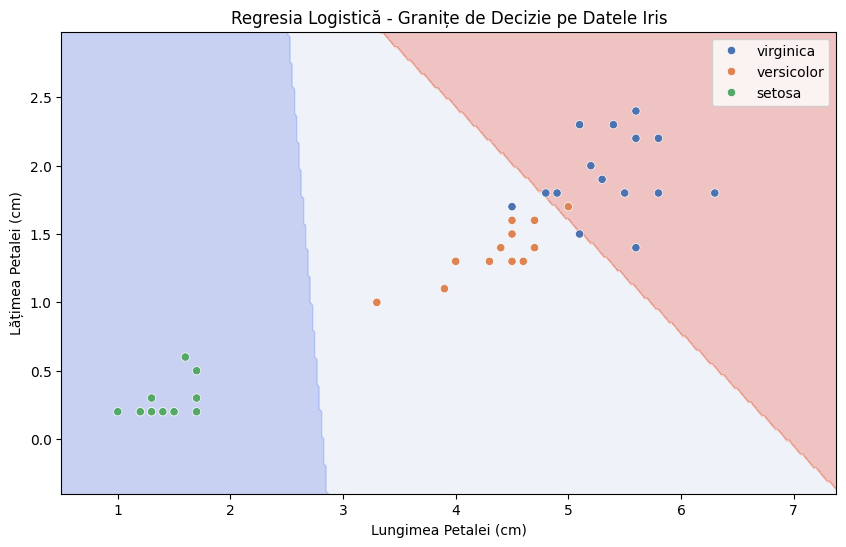

In [10]:
# Exemplu 7: Regresie Logistică & Vizualizare - Set de date Iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Folosim doar 2 caracteristici pentru vizualizare: lungimea și lățimea petalei
X_train_viz = X_train_iris[:, 2:]
X_test_viz = X_test_iris[:, 2:]

# Antrenăm modelul
model_logreg_iris = LogisticRegression(random_state=42)
model_logreg_iris.fit(X_train_viz, y_train_iris)

# Evaluăm modelul
y_pred = model_logreg_iris.predict(X_test_viz)
acuratete = accuracy_score(y_test_iris, y_pred)
print(f"Acuratețea Regresiei Logistice (pe 2 feature-uri): {acuratete:.2f}\n")

# Vizualizăm granițele de decizie
x_min, x_max = X_iris[:, 2].min() - 0.5, X_iris[:, 2].max() + 0.5
y_min, y_max = X_iris[:, 3].min() - 0.5, X_iris[:, 3].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model_logreg_iris.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_test_iris[:, 2], y=X_test_iris[:, 3], hue=iris.target_names[y_test_iris], palette='deep')
plt.xlabel('Lungimea Petalei (cm)')
plt.ylabel('Lățimea Petalei (cm)')
plt.title('Regresia Logistică - Granițe de Decizie pe Datele Iris')
plt.show()

# OBS.: Graficul arată cum modelul a "învățat" trei regiuni distincte. Orice
# floare nouă care, prin măsurătorile sale, pică într-una din aceste regiuni
# colorate, va fi clasificată corespunzător.

In [11]:
# __EXERCIȚIU__
# Să presupunem că avem un set de date despre studenți. Avem două
# caracteristici:
# - ore_studiu (câte ore pe săptămână studiază)
# - participare_curs (numărul de cursuri la care au participat)
# Eticheta este 1 dacă studentul a promovat examenul și 0 dacă a picat.

# Datele sunt:
X_studenti = np.array([[5, 10], [10, 15], [3, 8], [8, 12], [12, 18], [2, 5], [6, 11], [15, 20]])
y_studenti = np.array([0, 1, 0, 1, 1, 0, 0, 1])

# 1. Antrenați un model de Regresie Logistică pe aceste date.
# 2. Preziceți dacă un student care a studiat 7 ore și a participat la 13
# cursuri va promova.
# 3. Preziceți pentru un student care a studiat 4 ore și a participat la 6
# cursuri.

# HINT: Nu este nevoie să împărțiți datele în train/test deoarece vrem să
# folosim tot setul pentru învățare. Pentru a face o predicție pentru un singur
# exemplu, trebuie să-l transmitem ca o listă de liste.
# Ex.: Prezicem dacă un student care a stdiat 15 ore și a participat la 20
# de cursuri va promova astfel: model.predict([[15, 20]]).

## K-Nearest Neighbors (KNN)

**KNN** este unul dintre cei mai intuitivi algoritmi de clasificare. Analogia de bază este: "Spune-mi cine îți sunt prietenii (vecinii), și îți voi spune cine ești".

**Cum funcționează?**
1.  Alege un număr `K` de vecini (de obicei un număr impar mic, ca 3, 5 sau 7).
2.  Pentru un nou punct de date pe care vrei să-l clasifici, algoritmul se uită la cei mai apropiați `K` vecini din setul de antrenament.
3.  Noul punct primește eticheta care apare cel mai des printre acei `K` vecini (vot majoritar).

! **IMPORTANT**: Deoarece KNN se bazează pe distanță, este esențial ca datele să fie **scalate** (aduse la aceeași scară) înainte de a folosi algoritmul.  Altfel, o caracteristică cu valori mari (ex: salariul) ar putea domina una cu valori mici (ex: vârsta).

In [12]:
# Exemplu 8: Antrenarea unui model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Folosim același set de date ca la Regresia Logistică
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Scalăm datele
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Creăm și antrenăm modelul cu K=5
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# 3. Facem predicții
predictii_knn = model_knn.predict(X_test_scaled)

acuratete_knn = accuracy_score(y_test, predictii_knn)
print(f"Acuratețea modelului KNN: {acuratete_knn:.2f}")

# OBS.: scaler.fit_transform(X_train) învață media și deviația standard din
# datele de antrenament și apoi le transformă.
# scaler.transform(X_test) folosește aceleași valori (învățate pe train) pentru
# a transforma datele de test.
# Nu facem niciodată .fit() pe datele de test pentru a nu pierde informații
# în procesul de antrenare.

Acuratețea modelului KNN: 1.00


In [13]:
# Exemplu 9: KNN pe setul de date Iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1. Scalăm datele (folosind toate cele 4 caracteristici de data aceasta)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_iris)
X_test_scaled = scaler.transform(X_test_iris)

# 2. Antrenăm modelul KNN cu K=5
model_knn_iris = KNeighborsClassifier(n_neighbors=5)
model_knn_iris.fit(X_train_scaled, y_train_iris)

# 3. Facem predicții și evaluăm
y_pred_knn = model_knn_iris.predict(X_test_scaled)

print("--- Raport de Clasificare KNN ---")
print(classification_report(y_test_iris, y_pred_knn, target_names=iris.target_names))

# OBS.: `classification_report` ne oferă o privire detaliată asupra performanței per clasă,
# incluzând precizia, recall-ul și f1-score. Vedem că modelul KNN este extrem de performant
# pe acest set de date.

--- Raport de Clasificare KNN ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



In [14]:
# __EXERCIȚIU__
# Se dă un set de date despre tipuri de vin, având două caracteristici:
# - nivel_alcool
# - intensitate_culoare
# Eticheta este 0 pentru Vin Alb și 1 pentru Vin Roșu.

X_vin = np.array([[12.5, 3.5], [13.8, 5.0], [11.5, 2.5], [14.2, 5.5], [12.0, 3.0], [13.5, 4.8]])
y_vin = np.array([0, 1, 0, 1, 0, 1])

# 1. Scalați caracteristicile folosind StandardScaler.
# 2. Antrenați un model KNeighborsClassifier cu K=3.
# 3. Preziceți tipul unui vin nou cu nivel_alcool=13.0 și
# intensitate_culoare=4.0.

# HINT: Nu uitați să scalați și datele noi înainte de a face predicția.

## Arbori de Decizie (Decision Trees)

Un **arbore de decizie** funcționează ca un joc de "20 de întrebări". Modelul învață o serie de reguli `if-else` pentru a împărți datele în grupuri din ce în ce mai pure. Fiecare nod din arbore reprezintă o întrebare (o condiție) despre o anumită caracteristică, iar fiecare ramură reprezintă răspunsul la acea întrebare. Frunzele arborelui conțin predicția finală.

**Avantaje**:
-   Sunt foarte ușor de interpretat și vizualizat.
-   Nu necesită scalarea datelor.

**Dezavantaje**:
-   Pot deveni foarte complecși și pot suferi de **supra-antrenare (overfitting)**, adică memorează datele de antrenament în loc să generalizeze.

In [15]:
# Exemplu 10: Antrenarea unui Arbore de Decizie
from sklearn.tree import DecisionTreeClassifier

# Folosim același set de date ca la exemplele anterioare
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Creăm și antrenăm modelul
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

# Facem predicții
predictii_tree = model_tree.predict(X_test)

acuratete_tree = accuracy_score(y_test, predictii_tree)
print(f"Acuratețea modelului Arbore de Decizie: {acuratete_tree:.2f}")

# OBS.: Parametrul `random_state` este folosit pentru a asigura
# reproductibilitatea, deoarece algoritmul poate implica aleatorizare în
# procesul de construcție a arborelui.

Acuratețea modelului Arbore de Decizie: 0.95


--- Raport de Clasificare Arbore de Decizie (pe 4 caracteristici) ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



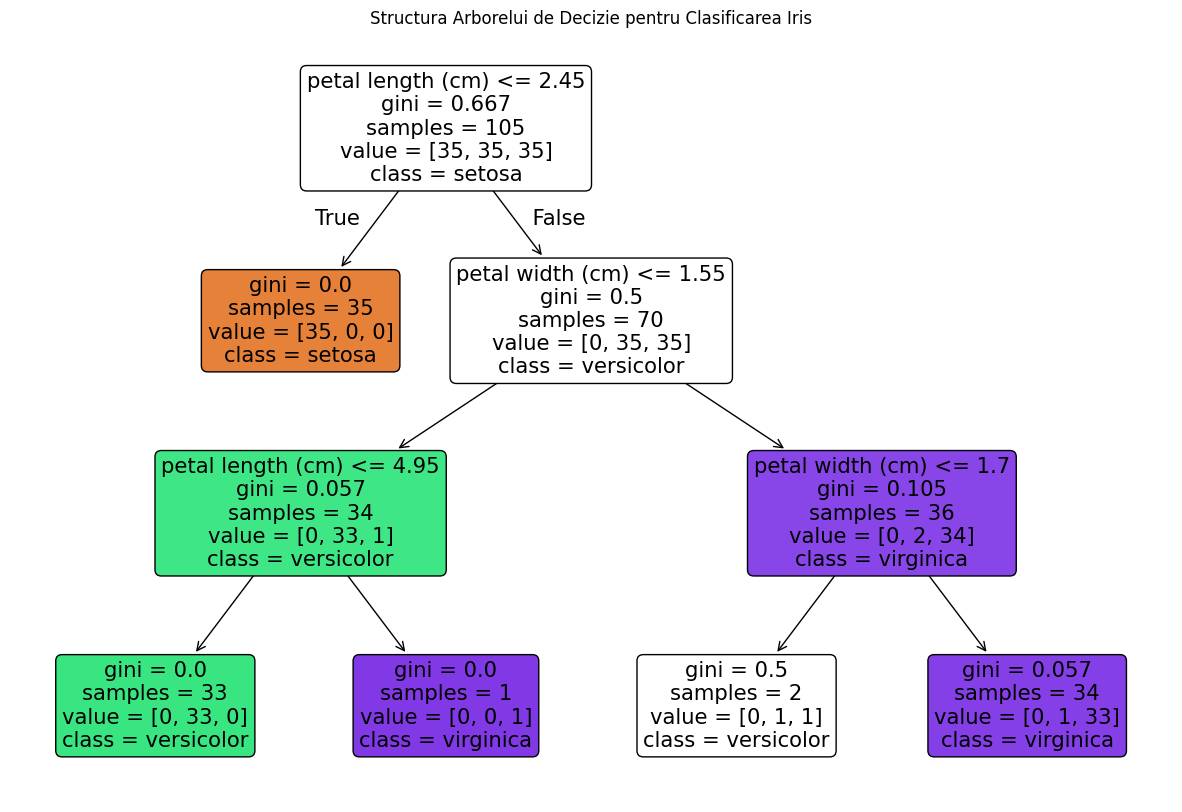

In [16]:
# Exemplu 11: Arbori de Decizie pe setul de date Iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Model pe toate cele 4 caracteristici (pentru performanță)
model_tree_iris = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree_iris.fit(X_train_iris, y_train_iris)
y_pred_tree = model_tree_iris.predict(X_test_iris)

print("--- Raport de Clasificare Arbore de Decizie (pe 4 caracteristici) ---")
print(classification_report(y_test_iris, y_pred_tree, target_names=iris.target_names))

# 2. Vizualizarea structurii arborelui
plt.figure(figsize=(15, 10))
plot_tree(model_tree_iris, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Structura Arborelui de Decizie pentru Clasificarea Iris")
plt.show()

# OBS.: Granițele de decizie sunt formate din dreptunghiuri. Fiecare linie verticală sau orizontală
# corespunde unei reguli (unei "întrebări") din arborele de decizie (de ex., "petal length <= 2.45 cm?").

In [17]:
# __EXERCIȚIU__
# Folosind setul de date cu studenți de la exercițiul anterior:
X_studenti = np.array([[5, 10], [10, 15], [3, 8], [8, 12], [12, 18], [2, 5], [6, 11], [15, 20]])
y_studenti = np.array([0, 1, 0, 1, 1, 0, 0, 1])

# 1. Antrenați un model DecisionTreeClassifier.
# 2. Calculați și afișați acuratețea modelului pe *întregul set de date* (din
# moment ce nu l-am împărțit).

# HINT: Puteți calcula acuratețea comparând y_studenti cu predicțiile făcute pe
# X_studenti.

___

# Capitol 4: Validare Încrucișată și Modele Complexe

O singură împărțire `train_test_split` poate fi uneori norocoasă (sau ghinionistă). Pentru o evaluare mai robustă a modelului, folosim o tehnică numită **validare încrucișată (Cross-Validation)**.

## K-Fold Cross-Validation

Cea mai comună tehnică este **K-Fold CV**. Aceasta funcționează astfel:
1.  Împărțim setul de date de antrenament în `K` "fold-uri" (bucăți) egale (de obicei K=5 sau K=10).
2.  Executăm un ciclu de `K` ori:
    a.  La fiecare pas, folosim `K-1` fold-uri pentru a antrena modelul.
    b.  Folosim fold-ul rămas pentru a testa modelul.
3.  La final, facem media celor `K` scoruri de performanță obținute. Acest scor mediu este o estimare mult mai stabilă a performanței modelului.

In [18]:
# Exemplu 12: Validare încrucișată cu K-Fold
from sklearn.model_selection import cross_val_score

# Folosim setul de date complet (X, y) generat anterior
# și un model de Regresie Logistică
model_logreg_cv = LogisticRegression()

# Aplicăm validare încrucișată cu 5 fold-uri
scoruri = cross_val_score(model_logreg_cv, X, y, cv=5, scoring='accuracy')

print(f"Scorurile pentru fiecare fold: {scoruri}")
print(f"Acuratețea medie (Cross-Validation): {scoruri.mean():.2f}")
print(f"Deviația standard a scorurilor: {scoruri.std():.2f}")

# OBS.: Deviația standard ne arată cât de mult variază performanța între diferitele împărțiri ale datelor.
# O deviație mică sugerează un model stabil.

Scorurile pentru fiecare fold: [0.9  0.95 1.   1.   1.  ]
Acuratețea medie (Cross-Validation): 0.97
Deviația standard a scorurilor: 0.04
